# INTRODUCTION TO PYTHON SCRIPTING FOR GEOSPATIAL

**XSAVI 810: INTRODUCTION TO PYTHON SCRIPTING FOR GEOSPATIAL**
    
## Class 4




[Talos - NYPD Crash Data Band-Aid](https://github.com/talos/nypd-crash-data-bandaid)

[Class 3 ArcPy Terminal Code live coding text](https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/misc/11-04-arcpy-code-terminal.txt)

[Class 3 Create Buffers from list live coding](https://github.com/pratt-savi-810/pratt-savi-810-2017-10/blob/master/misc/11-04-listBuffer.py)



* Geocoding API Example (geopy)


# GIS without software
## 1. Geocoding
## 2. Plotting
## 3. Geoprocessing (buffer)

# [geopy](https://github.com/geopy/geopy)

> geopy is a Python 2 and 3 client for several popular geocoding web services.

> geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

> geopy includes geocoder classes for the OpenStreetMap Nominatim, ESRI ArcGIS, Google Geocoding API (V3), Baidu Maps, Bing Maps API, Mapzen Search, Yandex, IGN France, GeoNames, NaviData, OpenMapQuest, What3Words, OpenCage, SmartyStreets, geocoder.us, and GeocodeFarm geocoder services. The various geocoder classes are located in geopy.geocoders. - [https://github.com/geopy/geopy](https://github.com/geopy/geopy)


### Install [geopy](https://github.com/geopy/geopy)
    pip install geopy
    
Below example from [https://github.com/geopy/geopy](https://github.com/geopy/geopy)

In [8]:
from geopy.geocoders import Nominatim

geolocator = Nominatim()
location = geolocator.geocode("175 5th Avenue NYC")

In [9]:
print(location.address)

Flatiron Building, 175, 5th Avenue, Flatiron Building, Manhattan Community Board 5, New York County, NYC, New York, 10010, United States of America


In [10]:
print((location.latitude, location.longitude))

(40.7410861, -73.9896298241625)


In [11]:
print(location.raw)

{u'display_name': u'Flatiron Building, 175, 5th Avenue, Flatiron Building, Manhattan Community Board 5, New York County, NYC, New York, 10010, United States of America', u'importance': 0.51325082888049, u'place_id': u'133351612', u'lon': u'-73.9896298241625', u'lat': u'40.7410861', u'osm_type': u'way', u'licence': u'Data \xa9 OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', u'osm_id': u'264768896', u'boundingbox': [u'40.7407597', u'40.7413004', u'-73.9898715', u'-73.9895014'], u'type': u'attraction', u'class': u'tourism', u'icon': u'https://nominatim.openstreetmap.org/images/mapicons/poi_point_of_interest.p.20.png'}


In [12]:
address_list = ["200 Willoughby Ave, Brooklyn, NY 11205", "125 E 11th St, New York, NY 10003", "319 Frost St, Brooklyn, NY 11222"]

coords_list = []

for i in address_list:
    location = geolocator.geocode(i)
    coords_list.append([i, location.latitude, location.longitude])

In [13]:
coords_list

[['200 Willoughby Ave, Brooklyn, NY 11205', 40.69133825, -73.9630163297801],
 ['125 E 11th St, New York, NY 10003', 40.73176155, -73.9890945171458],
 ['319 Frost St, Brooklyn, NY 11222', 40.7193156, -73.9388225]]

In [18]:
import matplotlib

import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

%matplotlib inline

import numpy as np

Regular plot - scatterplot of data


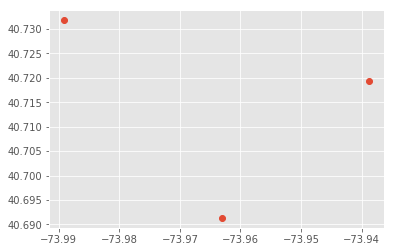

In [118]:
x = [item[2] for item in coords_list]
y = [item[1] for item in coords_list]

print('Regular plot - scatterplot of data')
plt.plot(x, y, 'o'); 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html#Scatter-Plots-with-plt.plot

Measuring Distance
https://github.com/geopy/geopy#measuring-distance
    



In [63]:
from geopy.distance import vincenty

pratt = (coords_list[0][1], coords_list[0][2])
webster_hall = (coords_list[1][1], coords_list[1][2])

In [64]:
print vincenty(pratt, webster_hall).miles, 'miles as the crow flies'

3.10726424012 miles as the crow flies


# [Geopandas](http://geopandas.org/)

> GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting. - [http://geopandas.org/](http://geopandas.org/)

### Install [Geopandas](http://geopandas.org/install.html#installing-geopandas)
    pip install geopandas

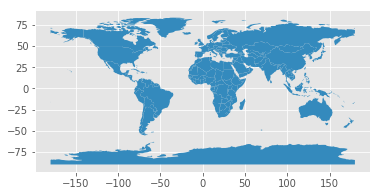

In [124]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot();

plot of geopandas dataframe


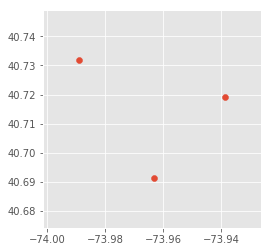

In [125]:
# https://gis.stackexchange.com/questions/253224/geopandas-buffer-using-geodataframe-while-maintaining-the-dataframe
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

cl = coords_list
    
gdf = gpd.GeoDataFrame([
            [cl[0][0],Point(cl[0][2],cl[0][1])],
            [cl[1][0],Point(cl[1][2],cl[1][1])],
            [cl[2][0],Point(cl[2][2],cl[2][1])]
            ], 
            columns = ['address','geometry'])

print('plot of geopandas dataframe')
gdf.plot()

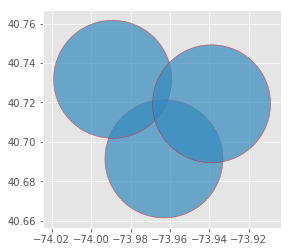

In [126]:
gdf_poly = gdf

gdf_poly['geometry'] = gdf_poly.geometry.buffer(0.03) # note in decimal degrees

gdf_poly.plot(edgecolor='red', alpha=0.7)

In [127]:
google - python salaries
geopy

SyntaxError: invalid syntax (<ipython-input-127-37ee87aef1f2>, line 1)

# Course Evaluation Forms
Let's take 10 minutes to fill this out;
[https://goo.gl/forms/EDe4MHqruk7g9Yo82](https://goo.gl/forms/EDe4MHqruk7g9Yo82)


